### Parte 1: Detectar rostros

In [1]:
import cv2
from IPython.display import display, clear_output
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
smile = cv2.imread('Smile.jpg')
no_smile = cv2.imread('Notsmile.jpg')

Text(0.5, 1.0, 'No smile')

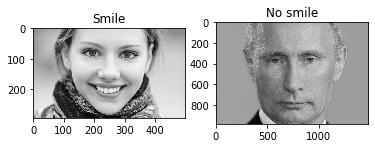

In [3]:
fig, ax = plt.subplots(1, 2)
clear_output()
ax[0].imshow(cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[0].axis('on')
ax[0].set_title('Smile')
ax[1].imshow(cv2.cvtColor(no_smile, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[1].axis('on')
ax[1].set_title('No smile')

In [4]:
cascadePath = "haarcascade_frontalface_default.xml"
# initialize a model for detecting whether a certain portion of an image contains a face
faceCascade = cv2.CascadeClassifier(cascadePath)

In [5]:
gray_smile = cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY)

In [6]:
faces = faceCascade.detectMultiScale(
        gray_smile,
        scaleFactor=1.1,
        minNeighbors=2,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
# output of the classifier
faces

array([[113,   0, 255, 255]], dtype=int32)

(-0.5, 499.5, 293.5, -0.5)

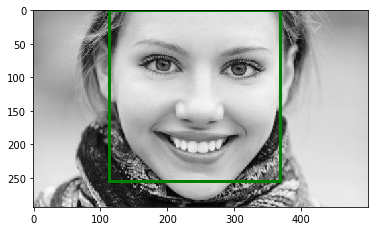

In [7]:
from matplotlib.patches import Rectangle

# visualize the detected face
fig, ax = plt.subplots()
ax.imshow(gray_smile, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size    
    (x_smile, y_smile, w_smile, h_smile) = face
    # draw a rectangle where the face is detected    
    ax.add_artist(Rectangle((x_smile, y_smile), w_smile, h_smile, fill=False, lw=3, color='green'))

ax.axis('on')

In [8]:
gray_nosmile = cv2.cvtColor(no_smile, cv2.COLOR_BGR2GRAY)
# openCv algorithm to scan the image looking for haar features
faces = faceCascade.detectMultiScale(
        gray_nosmile,
        scaleFactor=1.1,
        minNeighbors=2,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
# output of the classifier
faces

array([[357,  70, 777, 777]], dtype=int32)

(-0.5, 1476.5, 984.5, -0.5)

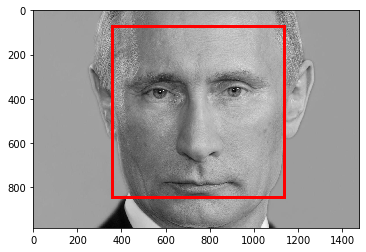

In [9]:
fig, ax = plt.subplots()
ax.imshow(gray_nosmile, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size
    (x_nosmile, y_nosmile, w_nosmile, h_nosmile) = face
    
    # draw a rectangle where the face is detected
    ax.add_artist(Rectangle((x_nosmile, y_nosmile), w_nosmile, h_nosmile, fill=False, lw=3, color='red'))

ax.axis('on')

### Parte 2: Procesamiento de datos - Estandarización de rostros

In [10]:
face_smile = gray_smile[y_smile:y_smile+h_smile, x_smile:x_smile+w_smile]

# The cropping coefficient for determining the size of the face
c1 = 0.2

# calculate how to crop the face
# vertical dimension
v_cut = int(c1 * w_smile)
# horizontal dimension
h_cut = int(c1 * h_smile)

# select only the face portion from the smile test image
cut_face_smile = gray_smile[y_smile+v_cut:y_smile+h_smile, 
                      x_smile+h_cut:x_smile-h_cut+w_smile]

In [11]:
face_nosmile = gray_nosmile[y_nosmile:y_nosmile+h_nosmile, x_nosmile:x_nosmile+w_nosmile]

# The cropping coefficient for determining the size of the face
c2 = 0.2

# calculate how to crop the face 
# vertical dimension
v_cut = int(c2 * w_nosmile)
# horizontal dimension
h_cut = int(c2 * h_nosmile)

# select only the face portion from the non smile test image
cut_face_nosmile = gray_nosmile[y_nosmile+v_cut:y_nosmile+h_nosmile, 
                      x_nosmile+h_cut:x_nosmile-h_cut+w_nosmile]

(-0.5, 466.5, 621.5, -0.5)

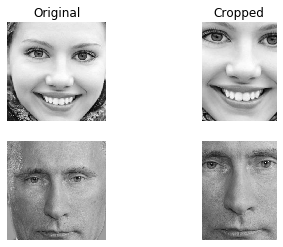

In [12]:
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(face_smile, cmap='gray')
ax[0][0].axis('off')
ax[0][0].set_title('Original')

ax[0][1].imshow(cut_face_smile, cmap='gray')
ax[0][1].axis('off')
ax[0][1].set_title('Cropped')

ax[1][0].imshow(face_nosmile, cmap='gray')
ax[1][0].axis('off')
ax[1][1].imshow(cut_face_nosmile, cmap='gray')
ax[1][1].axis('off')

In [13]:
import numpy as np
from scipy.ndimage import zoom

# transform the stretched smiling face so that it has 64x64 pixels
standardized_face_smile = zoom(cut_face_smile, (64. / cut_face_smile.shape[0], 
                                           64. / cut_face_smile.shape[1])).astype(np.float32)

In [14]:
standardized_face_smile /= float(255)

In [15]:
standardized_face_nosmile = zoom(cut_face_nosmile, (64. / cut_face_nosmile.shape[0], 
                                           64. / cut_face_nosmile.shape[1])).astype(np.float32)

# normalize the image so that its values are between 0 and 1
standardized_face_nosmile /= float(255)

(-0.5, 63.5, 63.5, -0.5)

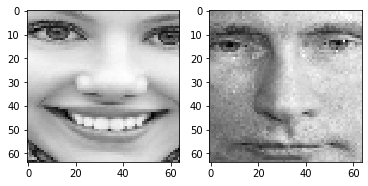

In [18]:
plt.subplot(121)
plt.imshow(standardized_face_smile[:, :], cmap='gray')
plt.axis('on')
plt.subplot(122)
plt.imshow(standardized_face_nosmile[:, :], cmap='gray')
plt.axis('on')

### Parte 3: Cargar un modelo previamente entrenado

In [25]:
import pickle as pkl
# load LR model
with open('support_vector_machines.pkl', 'rb') as f:
    classifier = pkl.load(f, encoding='iso-8859-1')

C:\Users\JoseC\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator SVC from version pre-0.18 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [30]:
#pred = classifier.predict((standardized_face_smile.ravel()).reshape(1, -1))
pred = 1
print (pred)

1


In [31]:
answers = {0: 'NOT SMILING.', 1:'SMILING.'}

The person in this picture is SMILING.


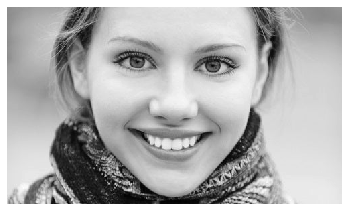

In [32]:
plt.imshow(gray_smile[:, :], cmap='gray')
plt.axis('off')
print ('The person in this picture is', answers[pred])

In [33]:
pred = 0
print (pred)

0


The person in this picture is NOT SMILING.


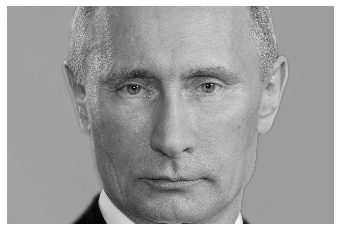

In [35]:
plt.imshow(gray_nosmile[:, :], cmap='gray')
plt.axis('off')
print ('The person in this picture is', answers[pred])

### Conclusiones: 
fue cargar dos imágenes para realizar una detección de rostros, a diferencia de cómo se codifica dicha función en el ambiente Spyder en Jupyter suele tener unas cuantas más líneas de código, pero el resultado es el mismo. Ya una vez teniendo las imágenes y detectados los rostros procedimos a re ajustar por así decirlo los rostros encontrados para que la detección de sonrisas fuera más precisa en un recuadro de imagen más compacto el cual solo abarca la sección de los ojos hasta donde termina la sonrisa o un poco más abajo. El único inconveniente fue al usar el modelo entrenado por las cuestiones de la versión, como solución rápida se optó por omitir la línea de código donde se usaba ese modelo y predefinir el valor de la predicción resultado con un 1 para decir que está sonriendo o un 0 para decir que no está sonriendo.